### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("..")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/25-02-24/20240225_Sec100.xlsx")
df.head(6)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240225_KerlingBleach_AA_NC_,20240225_KerlingBleach_AA_NC_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20240225_KerlingBleach_AA_NC_1,20240225_KerlingBleach_AA_NC_,42.004,47.953,88.562,-25.304,59.843,51.0,47.0,(RH 6.5) breakend,NaN
5,20240225_KerlingBleach_AA_NC_2,20240225_KerlingBleach_AA_NC_,34.217,45.606,67.648,-22.316,53.676,40.0,39.0,breakend,NaN


In [4]:
TYPE = "Break stress"

In [5]:
df = df.rename(columns={'Unnamed: 7': 'Diameter 1', 
                        'Unnamed: 8': 'Diameter 2',
                        'Unnamed: 9': 'Note',
                        'Unnamed: 10': 'Humidity',})
df.head(2)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note,Humidity
0,NaN,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN,NaN


In [6]:
df = df.drop('Humidity', axis=1)
df.head(2)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
0,NaN,NaN,MPa/%,g,g,mm,%,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Yield Force,Break force,Distance to Break,Break Strain,NaN,NaN,NaN


In [7]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
4,20240225_KerlingBleach_AA_NC_1,20240225_KerlingBleach_AA_NC_,42.004,47.953,88.562,-25.304,59.843,51.0,47.0,(RH 6.5) breakend
5,20240225_KerlingBleach_AA_NC_2,20240225_KerlingBleach_AA_NC_,34.217,45.606,67.648,-22.316,53.676,40.0,39.0,breakend


In [8]:
df['Break force'] = df['Break force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
#df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
#df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note
4,20240225_KerlingBleach_AA_NC_1,20240225_KerlingBleach_AA_NC_,42.004,47.953,88.562,-25.304,59.843,51.0,47.0,(RH 6.5) breakend
5,20240225_KerlingBleach_AA_NC_2,20240225_KerlingBleach_AA_NC_,34.217,45.606,67.648,-22.316,53.676,40.0,39.0,breakend


In [9]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [10]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [11]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [12]:
df['Break stress'] = df['Break force'] / df['Area'] / 1000

In [13]:
df.head(2)

,Test ID,Batch,Young's Modulus,Yield Force,Break force,Distance to Break,Break Strain,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240225_KerlingBleach_AA_NC_1,20240225_KerlingBleach_AA_NC_,42.004,47.953,88.562,-25.304,59.843,51.0,47.0,(RH 6.5) breakend,0.0490,0.001886,0.003848,85.722449,46.964032
5,20240225_KerlingBleach_AA_NC_2,20240225_KerlingBleach_AA_NC_,34.217,45.606,67.648,-22.316,53.676,40.0,39.0,breakend,0.0395,0.001225,0.003848,107.459253,55.204043


<Figure size 1000x600 with 0 Axes>

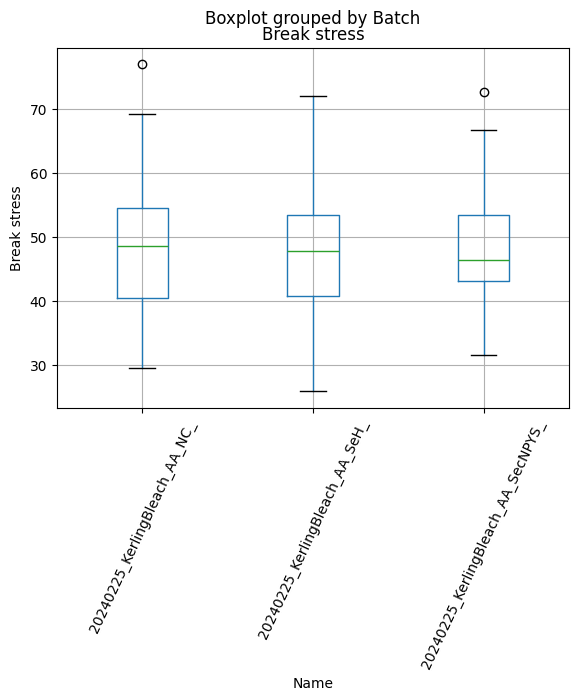

In [14]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [15]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240225_KerlingBleach_AA_NC_         9.373901
20240225_KerlingBleach_AA_SeH_        9.139691
20240225_KerlingBleach_AA_SecNPYS_    8.121331
Name: Break stress, dtype: float64


In [16]:
count = len(df[df['Batch'].str.contains('0mg')])
print(count)

0


In [17]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                    20240225_KerlingBleach_AA_NC_  \
 20240225_KerlingBleach_AA_NC_                               1.000   
 20240225_KerlingBleach_AA_SecNPYS_                          0.910   
 20240225_KerlingBleach_AA_SeH_                              0.587   
 
                                     20240225_KerlingBleach_AA_SecNPYS_  \
 20240225_KerlingBleach_AA_NC_                                     0.91   
 20240225_KerlingBleach_AA_SecNPYS_                                1.00   
 20240225_KerlingBleach_AA_SeH_                                    0.78   
 
                                     20240225_KerlingBleach_AA_SeH_  
 20240225_KerlingBleach_AA_NC_                                0.587  
 20240225_KerlingBleach_AA_SecNPYS_                           0.780  
 20240225_KerlingBleach_AA_SeH_                               1.000  ,
                                     20240225_KerlingBleach_AA_NC_  \
 20240225_KerlingBleach_AA_NC_                                -1.

In [18]:
unique_values = df['Note'].unique()
print(unique_values)

['(RH 6.5) breakend' 'breakend' 'ok' 'earlyish' 'almost breakend' 'early '
 'early' 'early??' 'short?' 'great' 'breakend top' 'weird' 'short' 'ok?']


let's remove all but ok

In [19]:
len(df)

300

In [20]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240225_KerlingBleach_AA_NC_         100
20240225_KerlingBleach_AA_SecNPYS_    100
20240225_KerlingBleach_AA_SeH_        100
Name: count, dtype: int64


In [21]:
df = df[df['Note'].isin(['ok', 'good', 'great'])]
len(df)

126

In [22]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240225_KerlingBleach_AA_SecNPYS_    44
20240225_KerlingBleach_AA_NC_         42
20240225_KerlingBleach_AA_SeH_        40
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

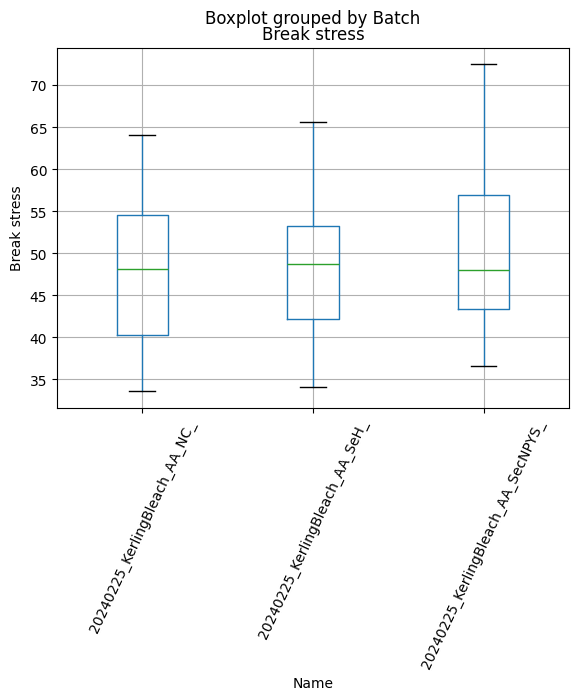

In [23]:
do_plot(df)

In [24]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240225_KerlingBleach_AA_NC_         8.496416
20240225_KerlingBleach_AA_SeH_        7.442194
20240225_KerlingBleach_AA_SecNPYS_    9.070488
Name: Break stress, dtype: float64


In [25]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240225_KerlingBleach_AA_NC_,9.373901,8.496416
20240225_KerlingBleach_AA_SeH_,9.139691,7.442194
20240225_KerlingBleach_AA_SecNPYS_,8.121331,9.070488


In [26]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                    20240225_KerlingBleach_AA_NC_  \
 20240225_KerlingBleach_AA_NC_                               1.000   
 20240225_KerlingBleach_AA_SecNPYS_                          0.314   
 20240225_KerlingBleach_AA_SeH_                              0.930   
 
                                     20240225_KerlingBleach_AA_SecNPYS_  \
 20240225_KerlingBleach_AA_NC_                                    0.314   
 20240225_KerlingBleach_AA_SecNPYS_                               1.000   
 20240225_KerlingBleach_AA_SeH_                                   0.499   
 
                                     20240225_KerlingBleach_AA_SeH_  
 20240225_KerlingBleach_AA_NC_                                0.930  
 20240225_KerlingBleach_AA_SecNPYS_                           0.499  
 20240225_KerlingBleach_AA_SeH_                               1.000  ,
                                     20240225_KerlingBleach_AA_NC_  \
 20240225_KerlingBleach_AA_NC_                               -1.0

more check

In [27]:
bio = df.groupby('Batch')[TYPE].mean()
print(bio)

Batch
20240225_KerlingBleach_AA_NC_         47.792991
20240225_KerlingBleach_AA_SeH_        47.625314
20240225_KerlingBleach_AA_SecNPYS_    49.921657
Name: Break stress, dtype: float64


In [28]:
bio = df.groupby('Batch')[TYPE].median()
print(bio)

Batch
20240225_KerlingBleach_AA_NC_         48.106971
20240225_KerlingBleach_AA_SeH_        48.740145
20240225_KerlingBleach_AA_SecNPYS_    48.012694
Name: Break stress, dtype: float64
